In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Nadam



C:\Users\kmura\AppData\Local\Programs\Python\Python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [6]:
frames=5
channels=3
rows=224
columns=224
classes=2


video = Input(shape=(frames,
                     rows,
                     columns, channels))
cnn_base = VGG16(input_shape=(rows,columns,channels),weights="imagenet",include_top=False)

cnn_out = GlobalAveragePooling2D()(cnn_base.output)
print(cnn_base.summary())
print("----------------------------------")
cnn = Model(inputs=cnn_base.input, outputs=cnn_out)
cnn.trainable = False
print(cnn.summary())
print("----------------------------------")

encoded_frames = TimeDistributed(cnn)(video)
print(encoded_frames)
encoded_sequence = LSTM(256)(encoded_frames)
hidden_layer = Dense(output_dim=1024, activation="relu")(encoded_sequence)
outputs = Dense(output_dim=classes, activation="softmax")(hidden_layer)
model = Model([video], outputs)
model.summary()

optimizer = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=1e-08,schedule_decay=0.004)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["categorical_accuracy"]) 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

C:\Users\kmura\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
C:\Users\kmura\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`


In [7]:
from keras.utils import plot_model

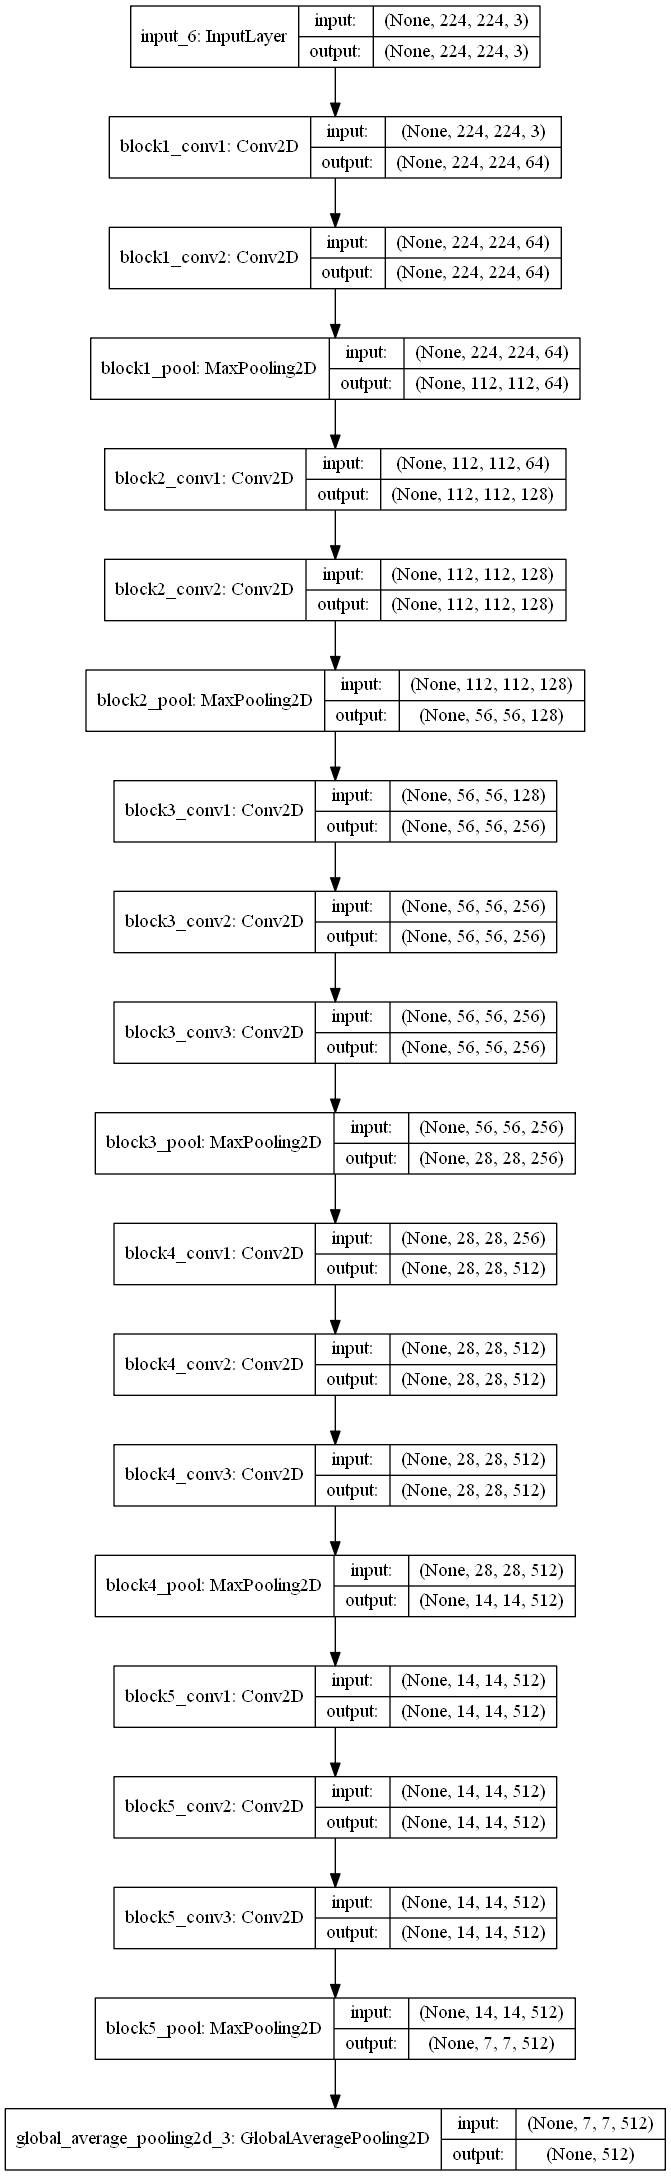

In [10]:

plot_model(cnn,to_file='cnn_inp_TDLayer.png',show_shapes=True)
from IPython.display import Image
Image("cnn_inp_TDLayer.png")

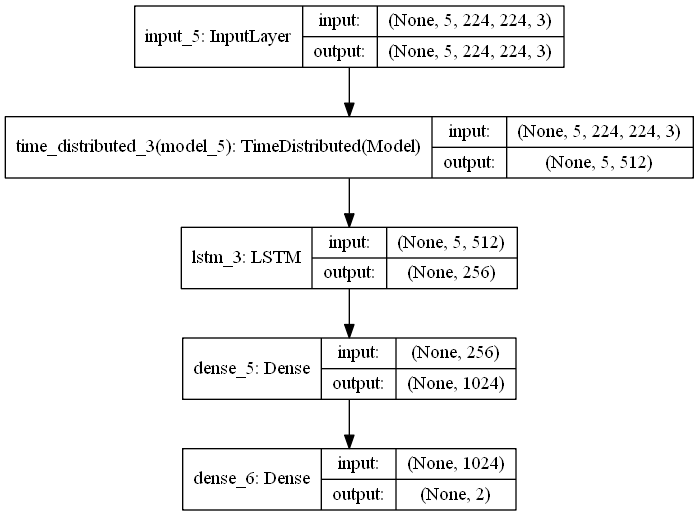

In [9]:

plot_model(model,to_file='model_main.png',show_shapes=True)
from IPython.display import Image
Image("model_main.png")
